In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import os

In [2]:
# Paths
root = '.'
demo_data_path = os.path.join(root, 'data', 'demo', 'test.csv')
weights_path = os.path.join(root, 'weights', 'best_weights.h5')

In [3]:
sys.path.append(root)
from model import Model

In [4]:
model = Model().get_model()
# model.summary()

In [5]:
model.load_weights(weights_path)

In [6]:
demo_data = pd.read_csv(demo_data_path).sample(n=10)

In [7]:
emotion_dict = {0: 'Angry',
               1: 'Disgust',
               2: 'Fear',
               3: 'Happy',
               4: 'Sad',
               5: 'Surprise',
               6: 'Neutral'}

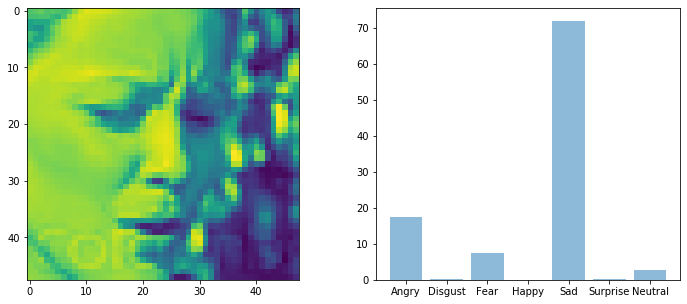

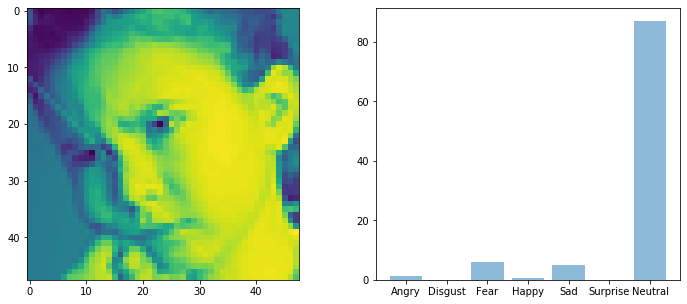

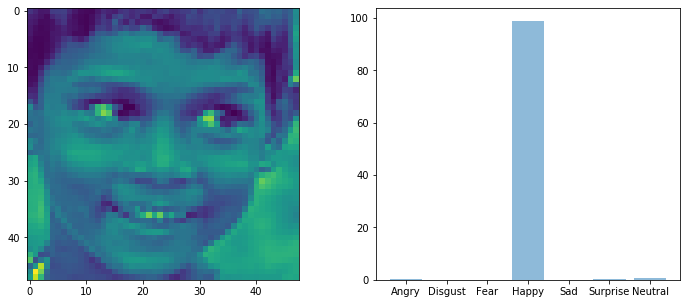

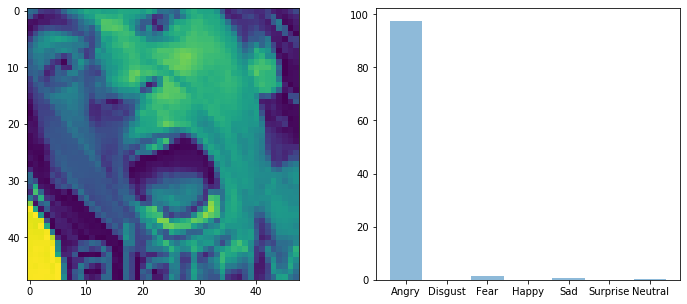

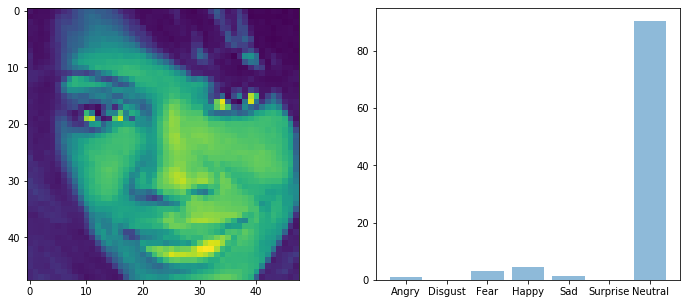

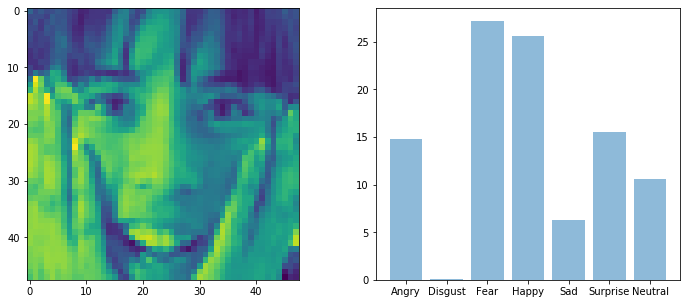

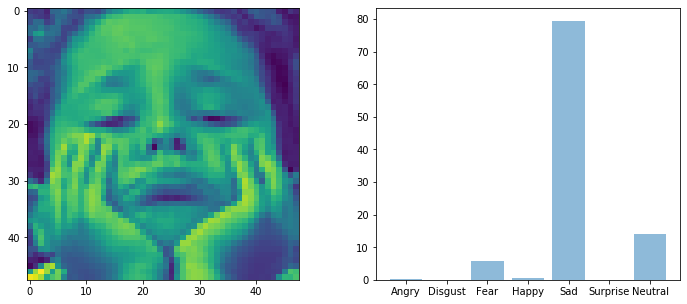

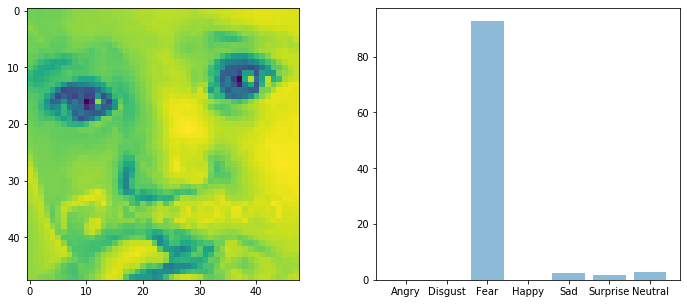

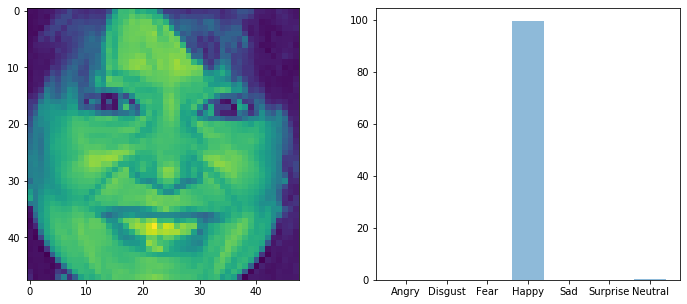

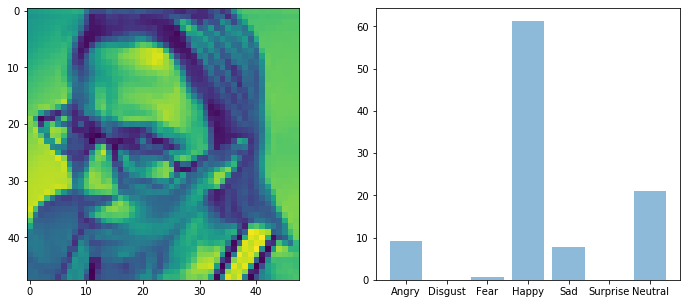

In [8]:
for i, row in demo_data.iterrows():
    image = np.fromstring(row['pixels'], dtype=np.float32, sep=' ').reshape((1, 48, 48, 1)) / 255.
    emotions = list(emotion_dict.values())
    emotion_conf = model(image, training=False).numpy().T.reshape((7,)) * 100
    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(image[0, :, :, 0])
    y_pos = np.arange(len(emotions))
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.bar(y_pos, emotion_conf, align='center', alpha=0.5)
    ax2.set_xticks(y_pos)
    ax2.set_xticklabels(emotions, fontdict=None, minor=False)
    plt.show()